In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("./^NSEI (6).csv")
df
df["isPivot"]=0

In [3]:
df.tail()

,Date,Adj Close,isPivot
496,11-01-2021,14484.75000,0
497,12-01-2021,14563.45020,0
498,13-01-2021,14564.84961,0
499,14-01-2021,14595.59961,0
500,15-01-2021,14433.70020,0


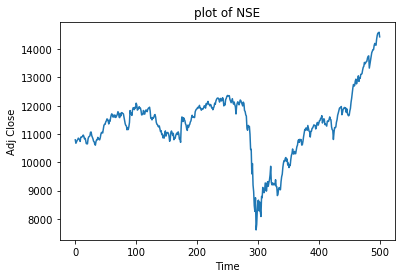

In [4]:
plt.plot(df["Adj Close"])
plt.ylabel('Adj Close')
plt.xlabel("Time")
plt.title("plot of NSE")
plt.show()

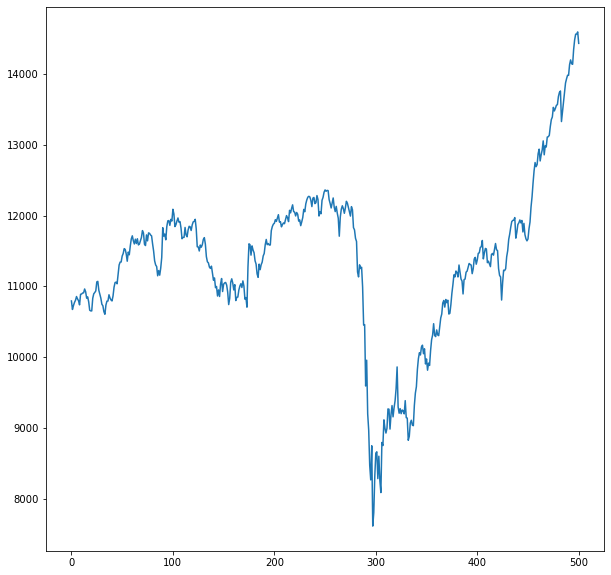

In [5]:
df["Adj Close"].plot(figsize=(10,10))

In [6]:
df["Adj Close"]=df["Adj Close"].rolling(window=5).mean()

In [7]:
df=df[4:]

In [26]:
Range=[0,0,0,0,0]
for i in range(1,len(Range)):
    print((i, Range[i]))

(1, 0)
(2, 0)
(3, 0)
(4, 0)


In [31]:
pivots=[]
dates=[]
datesIndex=[]
# slopesMax=[0,0,0,0,0]
# counter for storing how many days last pivot has been saved
count=0
lastPivot=0
# lastDate=0

Range=[0,0,0,0,0,0,0,0,0,0]
DateRange=[0,0,0,0,0,0,0,0,0,0]

for i in df.index:
#     df["Date"][i]= parser.parse(df["Date"][i]
                                
    currentMax=max(Range,default=0)
    slope=0
    for j in range(len(Range)):
        for k in range(j+1,len(Range)):
            currslope=(Range[k]-Range[j])/(k-j)
            slope=max(slope,currslope)
    value=round(df["Adj Close"][i],2)
    
    Range=Range[1:4]
    Range.append(value)
    DateRange=DateRange[1:4]
    DateRange.append(df["Date"][i])

    mySlope=0
    for j in range(len(Range)):
        for k in range(j+1,len(Range)):
            currslope=(Range[k]-Range[j])/(k-j)
            mySlope=max(mySlope,currslope)
    
    if slope==mySlope:
        count=count+1
    else:
        count=0
    if count==5:
        lastPivot=currentMax
        
        dateLoc=Range.index(lastPivot)
        lastDate=DateRange[dateLoc]
        pivots.append(lastPivot)
        dates.append(lastDate)
        datesIndex.append(i)
        df["isPivot"][i-2]=1
    

print()
print("Pivot Points->")
print(str(pivots))
print("Their corresponding dates")
print(str(dates))

ValueError: 11598.25 is not in list

In [7]:
len(pivots)

63

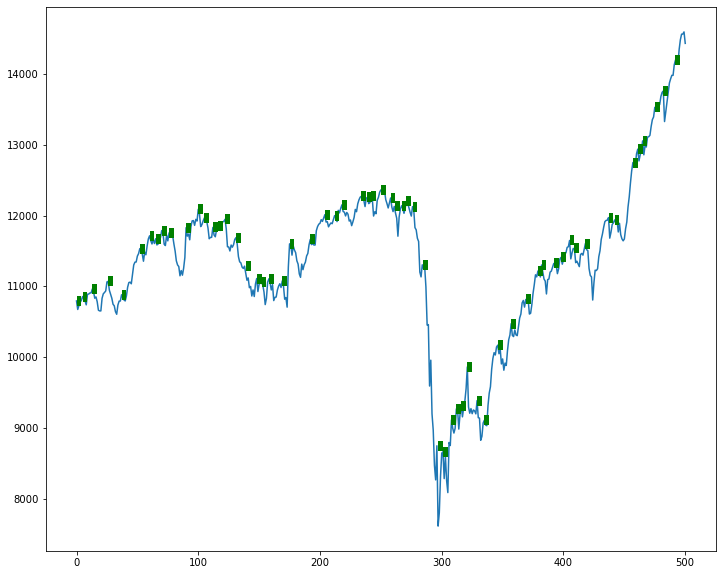

In [8]:
import datetime as dt

# df["Adj Close"].plot(figsize=(10,10))
df["Adj Close"].plot(figsize=(12,10))
timeD=dt.timedelta(days=30)
for i in range(len(pivots)):
    
#     print(dates[i]+str(timeD))
    plt.plot([datesIndex[i]-2,datesIndex[i]+2],[pivots[i],pivots[i]],linestyle=':',linewidth=10,color="green")
#     plt.plot_date([dates[i],dates[i]+str(timeD)],[pivots[i],pivots[i]],linestyle='-',linewidth=2)
    
plt.show()

In [119]:
df["isPivot"].unique()

array([0, 1], dtype=int64)

In [133]:
df["isPivot"].value_counts()


0    438
1     63
Name: isPivot, dtype: int64

In [135]:
df.to_csv("pivotsIdentified.csv")

In [95]:
df

,Date,Adj Close,isPivot
0,02-01-2019,10792.50000,0
1,03-01-2019,10672.25000,0
2,04-01-2019,10727.34961,1
3,07-01-2019,10771.79981,0
4,08-01-2019,10802.15039,0
...,...,...,...
496,11-01-2021,14484.75000,0
497,12-01-2021,14563.45020,0
498,13-01-2021,14564.84961,0
499,14-01-2021,14595.59961,0


In [90]:
from dateutil import parser
datetime_obj = parser.parse(df["Date"][0])
print(datetime_obj)

2019-02-01 00:00:00


In [98]:
for i in df.index:
    df["Date"][i]= parser.parse(df["Date"][i])

C:\Users\Shivam mittal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
df["Date"][490]

'31-12-2020'

In [105]:
df.Date = pd.to_datetime(df.Date)

In [106]:
df

,Date,Adj Close
0,2019-02-01,10792.50000
1,2019-03-01,10672.25000
2,2019-04-01,10727.34961
3,2019-07-01,10771.79981
4,2019-08-01,10802.15039
...,...,...
496,2021-11-01,14484.75000
497,2021-12-01,14563.45020
498,2021-01-13,14564.84961
499,2021-01-14,14595.59961
